In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [8]:
raw_data = pd.read_csv('D:\downloads\lre.csv')
raw_data.head()

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year,Model
0,BMW,4290,sedan,277,2.0,Petrol,yes,1991,320
1,Benz,7900,van,427,2.9,Diesel,yes,1999,Sprinter212
2,Benz,13300,sedan,358,5.0,Gas,yes,2003,500
3,Audi,23000,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [11]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year,Model
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000,5
unique,4,NaN,3,NaN,NaN,3,1,NaN,5
top,Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN,320
freq,2,NaN,2,NaN,NaN,3,5,NaN,1
mean,NaN,13358.000000,NaN,284.400000,3.220000,NaN,NaN,2002.200000,NaN
std,NaN,7573.197475,NaN,117.052552,1.342386,NaN,NaN,7.694154,NaN
min,NaN,4290.000000,NaN,120.000000,2.000000,NaN,NaN,1991.000000,NaN
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000,NaN
50%,NaN,13300.000000,NaN,277.000000,2.900000,NaN,NaN,2003.000000,NaN
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000,NaN


In [12]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000
unique,4,NaN,3,NaN,NaN,3,1,NaN
top,Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,3,5,NaN
mean,NaN,13358.000000,NaN,284.400000,3.220000,NaN,NaN,2002.200000
std,NaN,7573.197475,NaN,117.052552,1.342386,NaN,NaN,7.694154
min,NaN,4290.000000,NaN,120.000000,2.000000,NaN,NaN,1991.000000
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000
50%,NaN,13300.000000,NaN,277.000000,2.900000,NaN,NaN,2003.000000
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000


In [13]:
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
Engine          0
Engine Type     0
Registration    0
Year            0
dtype: int64

In [14]:
data_no_mv = data.dropna(axis=0)

In [16]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year
count,5,5.000000,5,5.000000,5.000000,5,5,5.000000
unique,4,NaN,3,NaN,NaN,3,1,NaN
top,Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,3,5,NaN
mean,NaN,13358.000000,NaN,284.400000,3.220000,NaN,NaN,2002.200000
std,NaN,7573.197475,NaN,117.052552,1.342386,NaN,NaN,7.694154
min,NaN,4290.000000,NaN,120.000000,2.000000,NaN,NaN,1991.000000
25%,NaN,7900.000000,NaN,240.000000,2.000000,NaN,NaN,1999.000000
50%,NaN,13300.000000,NaN,277.000000,2.900000,NaN,NaN,2003.000000
75%,NaN,18300.000000,NaN,358.000000,4.200000,NaN,NaN,2007.000000


C:\Users\S\AppData\Local\Temp\ipykernel_9104\634542294.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Price'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

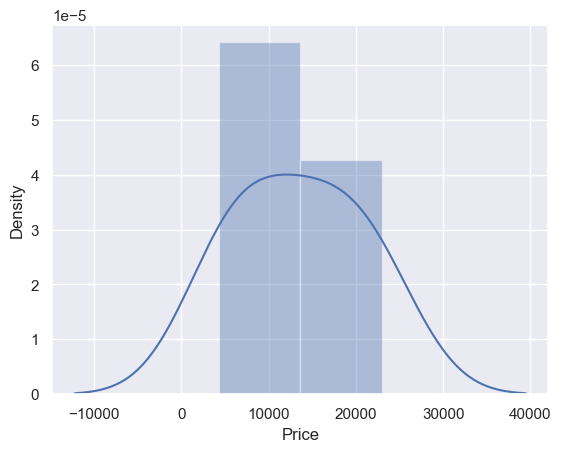

In [17]:
sns.distplot(data_no_mv['Price'])


In [19]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include ='all')

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year
count,4,4.000000,4,4.000000,4.000000,4,4,4.000000
unique,3,NaN,3,NaN,NaN,3,1,NaN
top,Benz,NaN,sedan,NaN,NaN,Petrol,yes,NaN
freq,2,NaN,2,NaN,NaN,2,4,NaN
mean,NaN,10947.500000,NaN,295.500000,2.975000,NaN,NaN,2001.000000
std,NaN,6142.829831,NaN,132.087092,1.415097,NaN,NaN,8.326664
min,NaN,4290.000000,NaN,120.000000,2.000000,NaN,NaN,1991.000000
25%,NaN,6997.500000,NaN,237.750000,2.000000,NaN,NaN,1997.000000
50%,NaN,10600.000000,NaN,317.500000,2.450000,NaN,NaN,2001.000000
75%,NaN,14550.000000,NaN,375.250000,3.425000,NaN,NaN,2005.000000


C:\Users\S\AppData\Local\Temp\ipykernel_9104\2589761964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_1['Price'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

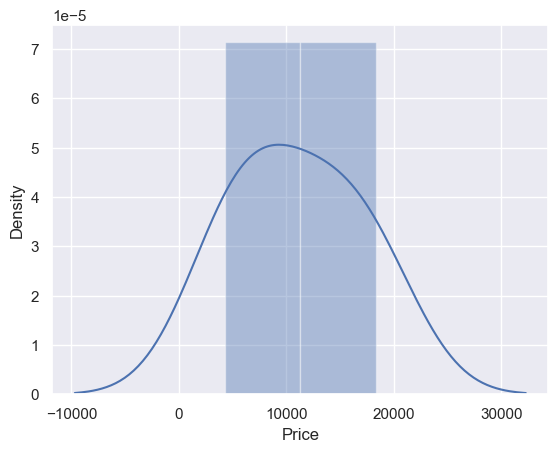

In [21]:
sns.distplot(data_1['Price'])

In [24]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]


C:\Users\S\AppData\Local\Temp\ipykernel_9104\1950307955.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_2['Mileage'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Mileage', ylabel='Density'>

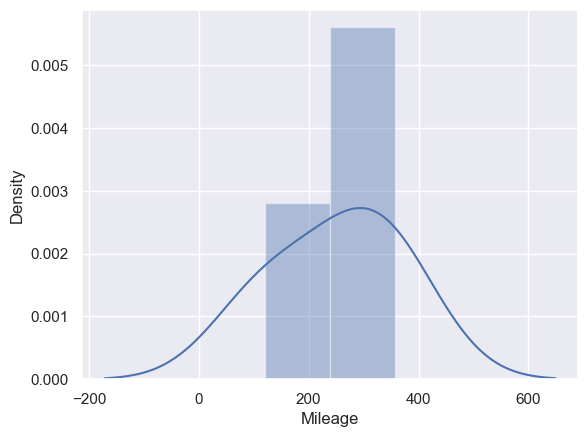

In [26]:
sns.distplot(data_2['Mileage'])

C:\Users\S\AppData\Local\Temp\ipykernel_9104\2069618946.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Engine'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Engine', ylabel='Density'>

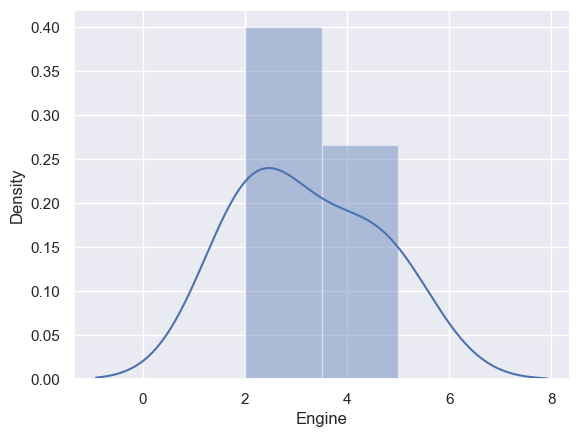

In [28]:
sns.distplot(data_no_mv['Engine'])

In [30]:
data_3 = data_2[data_2['Engine']<6.5]

C:\Users\S\AppData\Local\Temp\ipykernel_9104\3818505969.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_3['Engine'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Engine', ylabel='Density'>

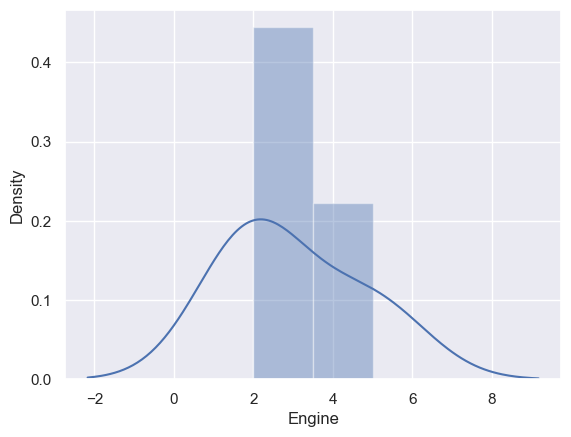

In [32]:
sns.distplot(data_3['Engine'])

C:\Users\S\AppData\Local\Temp\ipykernel_9104\534082538.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['Year'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

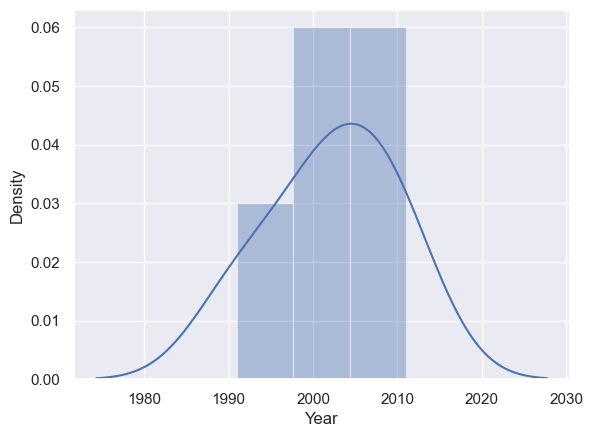

In [34]:
sns.distplot(data_no_mv['Year'])

In [38]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

C:\Users\S\AppData\Local\Temp\ipykernel_9104\2748958191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_4['Year'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Year', ylabel='Density'>

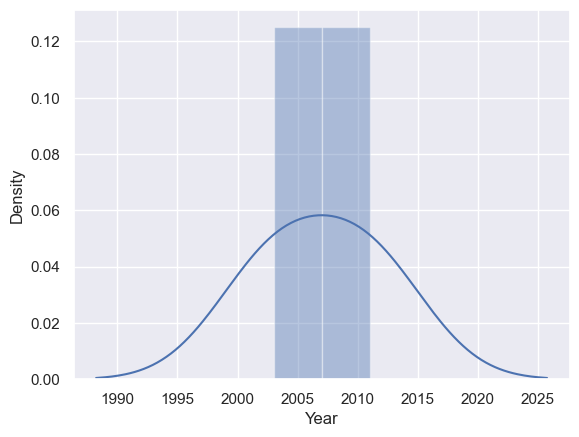

In [39]:
sns.distplot(data_4['Year'])

In [40]:
data_cleaned = data_4.reset_index(drop=True)

In [41]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year
count,2,2.000000,2,2.000000,2.00000,2,2,2.000000
unique,2,NaN,2,NaN,NaN,2,1,NaN
top,Benz,NaN,sedan,NaN,NaN,Gas,yes,NaN
freq,1,NaN,1,NaN,NaN,1,2,NaN
mean,NaN,15800.000000,NaN,239.000000,3.50000,NaN,NaN,2007.000000
std,NaN,3535.533906,NaN,168.291414,2.12132,NaN,NaN,5.656854
min,NaN,13300.000000,NaN,120.000000,2.00000,NaN,NaN,2003.000000
25%,NaN,14550.000000,NaN,179.500000,2.75000,NaN,NaN,2005.000000
50%,NaN,15800.000000,NaN,239.000000,3.50000,NaN,NaN,2007.000000
75%,NaN,17050.000000,NaN,298.500000,4.25000,NaN,NaN,2009.000000


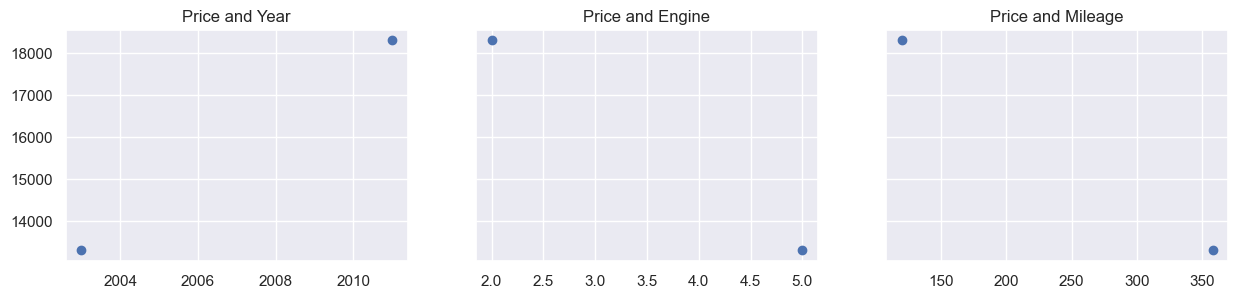

In [43]:
f , (ax1 ,ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Engine'],data_cleaned['Price'])
ax2.set_title('Price and Engine')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_9104\462586877.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_cleaned['Price'])
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Price', ylabel='Density'>

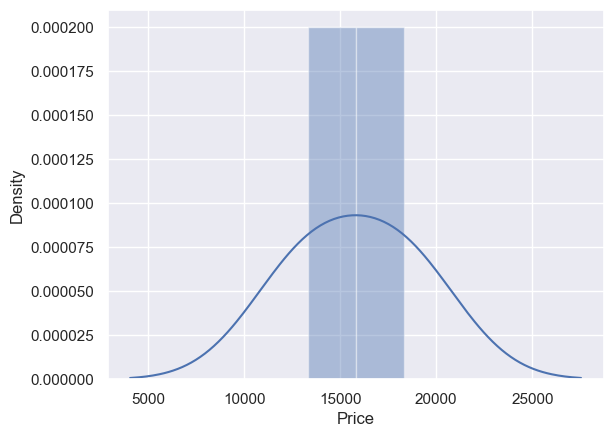

In [44]:
sns.distplot(data_cleaned['Price'])

In [46]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,Engine,Engine Type,Registration,Year,log_price
0,Benz,13300,sedan,358,5.0,Gas,yes,2003,9.495519
1,Toyota,18300,crossover,120,2.0,Petrol,yes,2011,9.814656


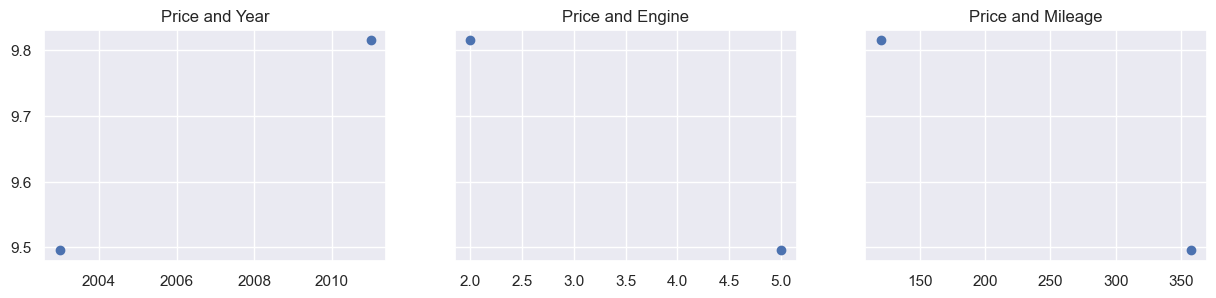

In [48]:
f , (ax1 ,ax2, ax3) = plt.subplots(1, 3, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['Engine'],data_cleaned['log_price'])
ax2.set_title('Price and Engine')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')
plt.show()

In [59]:
data_cleaned = data_cleaned.drop(['log_price'],axis=1)

In [54]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'Engine', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage','Year','Engine']]
vif = pd.DataFrame()
vif["VIF"]=[variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["features"]=variables.columns

D:\anaconda\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [62]:
vif

,VIF,features
0,inf,Mileage
1,inf,Year
2,inf,Engine


In [66]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

In [69]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity,drop_first=True)

In [70]:
data_with_dummies

,Mileage,Engine,Brand_Toyota,Body_sedan,Engine Type_Petrol
0,358,5.0,False,True,False
1,120,2.0,True,False,True


In [72]:
data_with_dummies.columns.values

array(['Mileage', 'Engine', 'Brand_Toyota', 'Body_sedan',
       'Engine Type_Petrol'], dtype=object)

In [73]:
cols = ['Mileage', 'Engine', 'Brand_Toyota', 'Body_sedan',
       'Engine Type_Petrol']

In [75]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,Mileage,Engine,Brand_Toyota,Body_sedan,Engine Type_Petrol
0,358,5.0,False,True,False
1,120,2.0,True,False,True


In [79]:
targets = data_preprocessed['Engine']
inputs = data_preprocessed.drop(['Engine'],axis=1)

In [82]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [83]:
inputs_scaled = scaler.transform(inputs)

In [85]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test =train_test_split(inputs_scaled,targets,test_size=0.2,random_state=365)

In [87]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [91]:
y_hat = reg.predict(x_train)

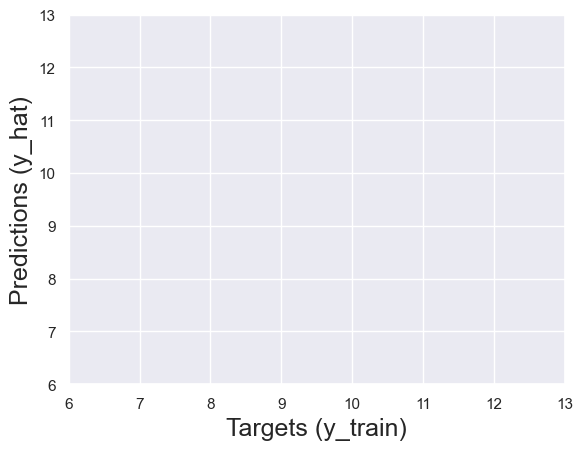

In [93]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

C:\Users\S\AppData\Local\Temp\ipykernel_9104\329104437.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_train - y_hat)
D:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda\Lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


Text(0.5, 1.0, 'Residuals PDF')

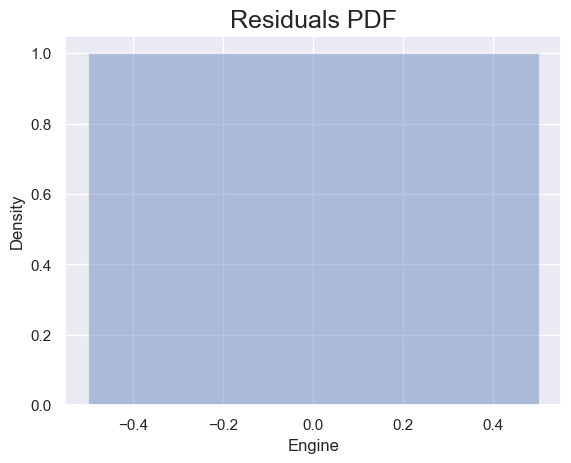

In [96]:
sns.distplot(y_train - y_hat)
plt.title("Residuals PDF", size=18)

In [98]:
reg.score(x_train,y_train)

D:\anaconda\Lib\site-packages\sklearn\metrics\_regression.py:918: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


nan

In [100]:
reg.intercept_

5.0

In [102]:
reg.coef_

array([0., 0., 0., 0.])

In [106]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,0.0
1,Brand_Toyota,0.0
2,Body_sedan,0.0
3,Engine Type_Petrol,0.0


In [108]:
data_cleaned['Brand'].unique()

array(['Benz', 'Toyota'], dtype=object)

In [109]:
y_hat_test = reg.predict(x_test)

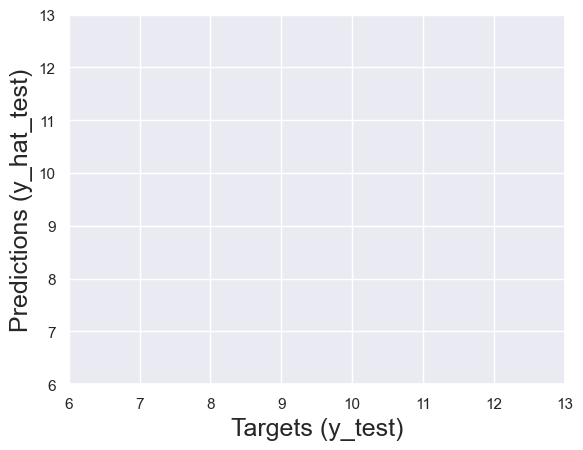

In [112]:
plt.scatter(y_test, y_hat_test,alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [114]:
df_pf=pd.DataFrame(y_hat_test, columns=['Pediction'])
df_pf.head()

,Pediction
0,5.0


In [116]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Pediction,Target
0,5.0,NaN


In [121]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0    2.0
Name: Engine, dtype: float64

In [122]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Pediction,Target
0,5.0,7.389056


In [126]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Pediction']

In [128]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Pediction,Target,Residual,Difference%
0,5.0,7.389056,2.389056,32.332358


In [131]:
df_pf.describe()

,Pediction,Target,Residual,Difference%
count,1.0,1.000000,1.000000,1.000000
mean,5.0,7.389056,2.389056,32.332358
std,NaN,NaN,NaN,NaN
min,5.0,7.389056,2.389056,32.332358
25%,5.0,7.389056,2.389056,32.332358
50%,5.0,7.389056,2.389056,32.332358
75%,5.0,7.389056,2.389056,32.332358
max,5.0,7.389056,2.389056,32.332358


In [136]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Pediction,Target,Residual,Difference%
0,5.00,7.39,2.39,32.33
